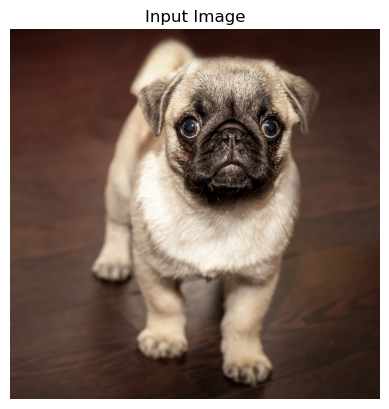

a diagram                               : 0.0010
a dog                                   : 0.9279
a computer chip                         : 0.0006
a screenshot of a neural network        : 0.0692
a handwritten digit                     : 0.0013


In [5]:
import torch
import matplotlib.pyplot as plt
from transformers import CLIPProcessor, CLIPModel
from skimage.io import imread

# 1. Load the CLIP model pretrained 
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# 2. Load an image
img  = imread("../img/dog1.jpg")

plt.imshow(img)
plt.axis("off")
plt.title("Input Image")
plt.show()

# 3. text candidated 
texts = [
    "a diagram",
    "a dog",
    "a computer chip",
    "a screenshot of a neural network",
    "a handwritten digit",
]

# 4. Prepare input for CLIP
inputs = processor(text=texts, images=img, return_tensors="pt", padding=True)

# 5. Obtain the  similarity scores (cosine)
with torch.no_grad():
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image  # shape [1, len(texts)]
    probs = logits_per_image.softmax(dim=1)      # convert to probabilities

# 6. Show results 
for txt, p in zip(texts, probs[0]):
    print(f"{txt:40s}: {p.item():.4f}")
